# Imports

In [5]:
import pandas as pd
import numpy as np
import scanpy as sc

In [6]:
from werkzeug.utils import secure_filename

In [208]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Define path to the data

In [12]:
path_mtx_folder='data/filtered_gene_bc_matrices/hg19/'
path_file_h5ad='data/filtered_gene_bc_matrices/pbmc3k.h5ad'

# Read mtx file

In [4]:
def read_mtx(path_mtx_folder):
    """" Function for reading 10x formatted (filtered and normalized) single cell data
    Input: path to the folder containing matrix.mtx, barcodes.tsv and genes.tsv files
    Output: AnnData object

    """
    # Add module for reading unstructured data
    adata = sc.read_10x_mtx(path_mtx_folder,            # the directory with the `.mtx` file
                            var_names='gene_symbols',   # use gene symbols for the variable names (variables-axis index)
                            cache=True)                 # write a cache file for faster subsequent reading
    return adata

In [26]:
adata=read_mtx(path_mtx_folder)

In [27]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

# Analyze and cluster the data

## Check if the data is already logaritmized

In [36]:
adata.uns_keys

<bound method AnnData.uns_keys of AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'>

In [39]:
try: 
    adata.uns['log1p']
    print('log1p is present')
except:
    print('No log1p')

No log1p


In [40]:
try: 
    adata.uns['log1p']
    print('The data is already logaritmized')
except:
    print('No log1p')
    print('Logarithmizing the data')
    sc.pp.log1p(adata) 

No log1p
Logarithmizing the data


In [41]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'
    uns: 'log1p'

In [44]:
try: 
    adata.uns['log1p']
    print('The data is already logaritmized')
except:
    print('No log1p')
    print('Logarithmizing the data')
    sc.pp.log1p(adata) 

The data is already logaritmized


In [45]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'
    uns: 'log1p'

## Analyze and cluster

In [60]:
def analysis_clustering(adata, n_neighbors=10, n_pcs=20):
    """" Function for streamlined analysis and clustering of single cell data
    Input:  - AnnData object (with filtered and normalized counts)
            - n_neighbors=10: number of neighbors
            - n_pcs=40: number of PC to consider

    Output: AnnData object containing analysis results and ready for visualisation
    """
    ## Logarithmize the data (if needed, check if already done)
    try:                                
        adata.uns['log1p']
        print('The data is already logaritmized')
    except:
        print('No log1p')
        print('Logarithmizing the data')
    
    ## Find highly variable genes
    sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) 
    print('Identifyed highly variable genes')

    ##PCA 
    sc.tl.pca(adata, svd_solver='arpack') 
    print('Principal componenet analysis done')     

    ## Compute the neighborhood graph
    sc.pp.neighbors(adata, n_neighbors, n_pcs)
    print('Neighborhood graph done') 

    ## Compute UMAP
    sc.tl.umap(adata) 
    print('UMAP done')

    ## Leiden clustering
    sc.tl.leiden(adata)  
    print(f"Clustering done with {len(adata1.obs['leiden'].unique())} clusters")

    ## Return annotated AnnData object  
    return adata

In [61]:
adata1=analysis_clustering(adata, n_neighbors=20)

The data is already logaritmized
Identifyed highly variable genes
Principal componenet analysis done
Neighborhood graph done
UMAP done
Clustering done with 12 clusters


In [62]:
adata1

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'leiden'
    var: 'gene_ids', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [69]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'leiden'
    var: 'gene_ids', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [63]:
len(adata1.obs['leiden'].unique())
print(f"Clustering done with {len(adata1.obs['leiden'].unique())} clusters")

Clustering done with 12 clusters


/Users/afuchs/anaconda3/envs/project_sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


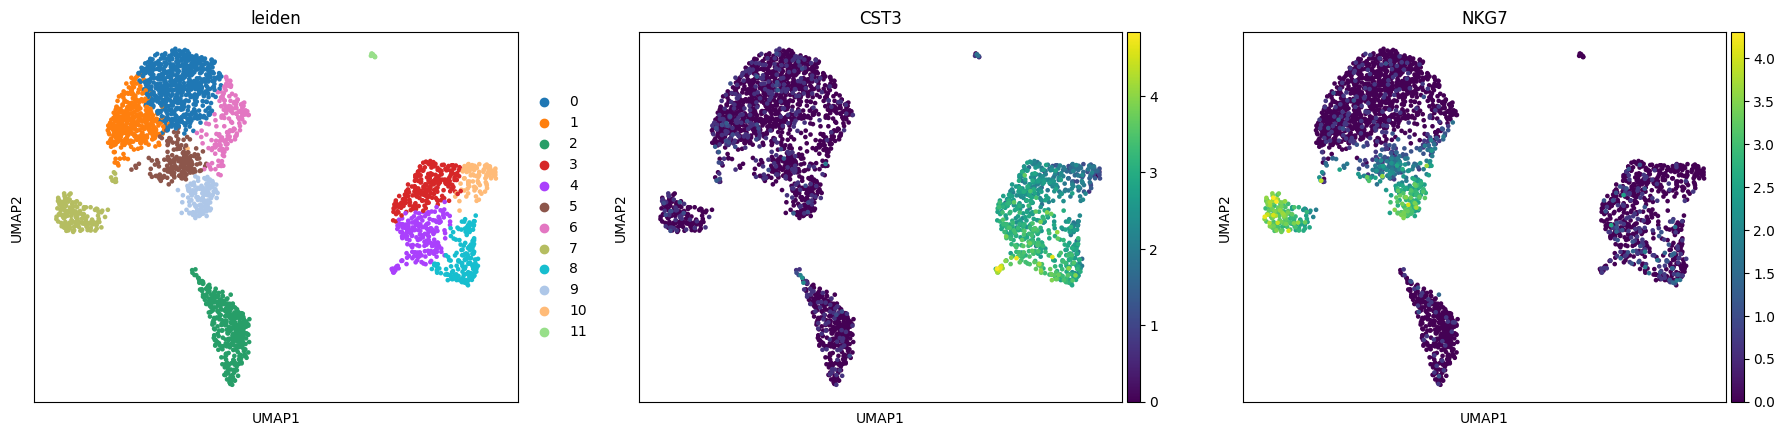

In [68]:
sc.pl.umap(adata1, color=['leiden', 'CST3', 'NKG7'])

# Load filtered and normalized h5ad file

In [148]:
def read_h5ad(path_file_h5ad):
    """" Function for reading analyzed AnnData object
    Input: path to the folder containing h5ad file
    Output: AnnData object containing results from previous analysis
    
    """
    adata=sc.read_h5ad(path_file_h5ad)
    print('Reading h5ad data')
    return adata

In [150]:
%pwd

'/Users/afuchs/Documents/Courses/Data_Science/sandbox/Final_project/scanpy/web_app'

In [170]:
adata3=read_h5ad('../write/pbmc3k_filtered_norm.h5ad')

Reading h5ad data


In [171]:
adata3

AnnData object with n_obs × n_vars = 2638 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [172]:
def analysis_clustering(adata, n_neighbors=10, n_pcs=20):
    """" Function for streamlined analysis and clustering of single cell data
    Input:  - AnnData object (with filtered and normalized counts)
            - n_neighbors=10: number of neighbors
            - n_pcs=40: number of PC to consider

    Output: AnnData object containing analysis results and ready for visualisation
    """
    ## Logarithmize the data (if needed, check if already done)
    try:                                
        adata.uns['log1p']
        print('The data is already logaritmized')
    except:
        print('No log1p')
        print('Logarithmizing the data')
        sc.pp.log1p(adata)
        print('Logarithmizing the data - Done')
    
    ## Find highly variable genes
    sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) 
    print('Identifyed highly variable genes')

    ##PCA 
    sc.tl.pca(adata, svd_solver='arpack') 
    print('Principal componenet analysis done')     

    ## Compute the neighborhood graph
    sc.pp.neighbors(adata, n_neighbors, n_pcs)
    print('Neighborhood graph done') 

    ## Compute UMAP
    sc.tl.umap(adata) 
    print('UMAP done')

    ## Leiden clustering
    sc.tl.leiden(adata)  
    print(f"Clustering done with {len(adata.obs['leiden'].unique())} clusters")

     ## Find differentially expressed genes in each group
    sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
    print('Ranking genes for each cluster')

    ## Return annotated AnnData object  
    return adata

In [181]:
adata4=analysis_clustering(adata3, n_neighbors=20)

The data is already logaritmized
Identifyed highly variable genes
Principal componenet analysis done
Neighborhood graph done
UMAP done
Clustering done with 9 clusters
Ranking genes for each cluster


In [182]:
adata4

AnnData object with n_obs × n_vars = 2638 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'rank_genes_groups', 'dendrogram_leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [187]:
%pwd

'/Users/afuchs/Documents/Courses/Data_Science/sandbox/Final_project/scanpy/web_app'

In [194]:
adata4.write('./uploads/clustering_results.h5ad')

In [195]:
# with open('/uploads/', 'w') as adata4:
#     adata4.write('clustering_results.h5ad')

In [179]:
print_adata=adata4.__repr__

In [180]:
print_adata

<bound method AnnData.__repr__ of AnnData object with n_obs × n_vars = 2638 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'rank_genes_groups', 'dendrogram_leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'>

# Load analyzed h5ad file

In [266]:
def read_h5ad(path_file_h5ad):
    """" Function for reading analyzed AnnData object
    Input: path to the folder containing h5ad file
    Output: AnnData object containing results from previous analysis
    
    """
    adata=sc.read_h5ad(path_file_h5ad)
    print('Reading h5ad data')
    return adata

In [262]:
%pwd

'/Users/afuchs/Documents/Courses/Data_Science/sandbox/Final_project/scanpy/web_app'

In [293]:
adata2=read_h5ad('../write/pbmc3k_analyzed.h5ad')

Reading h5ad data


In [294]:
print(adata2)

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


## Visualize Clustering

/Users/afuchs/anaconda3/envs/project_sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


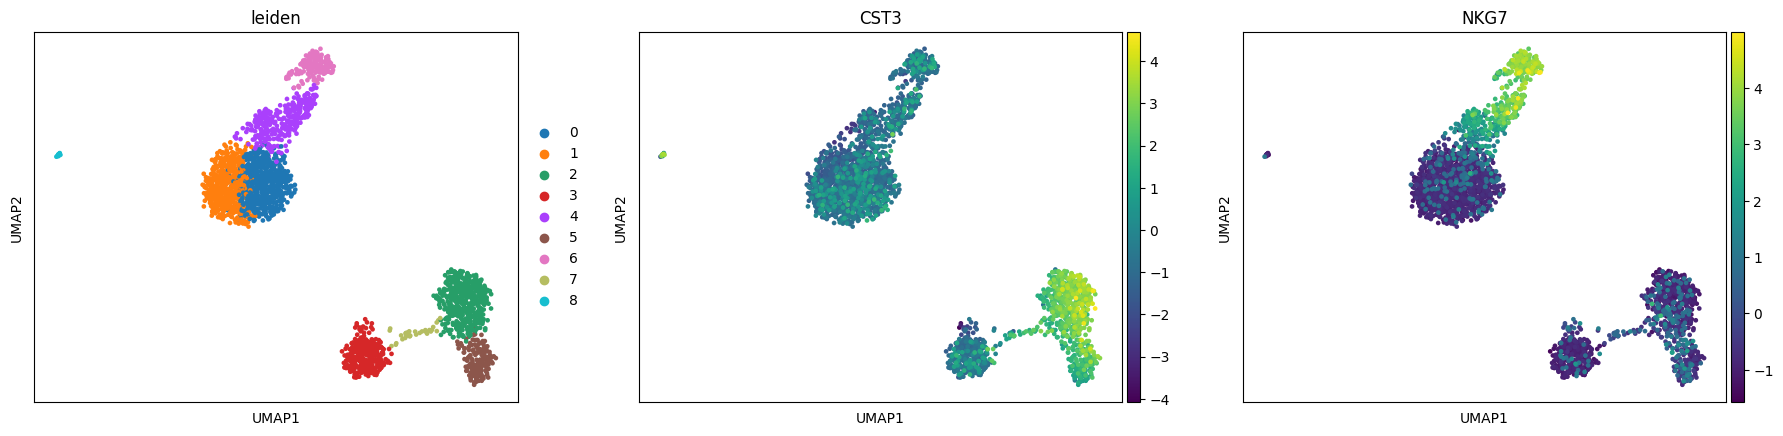

In [270]:
sc.pl.umap(adata2, color=['leiden', 'CST3', 'NKG7'])

/Users/afuchs/anaconda3/envs/project_sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


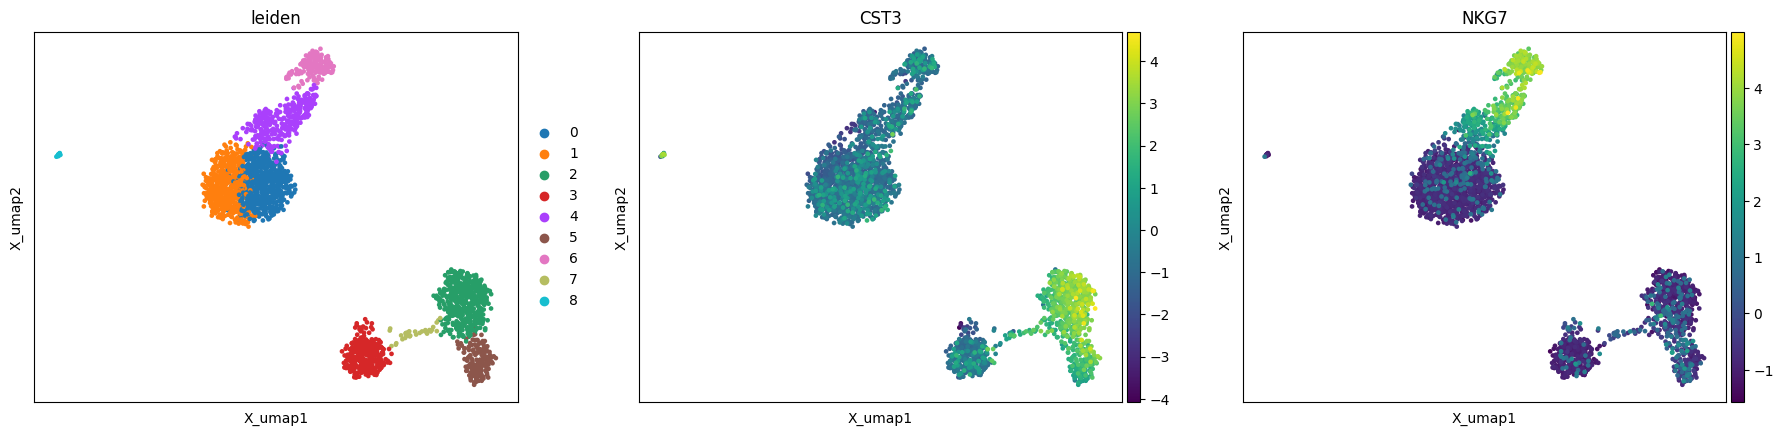

In [271]:
sc.pl.embedding(adata2, 'X_umap', color=['leiden', 'CST3', 'NKG7'])

/Users/afuchs/anaconda3/envs/project_sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


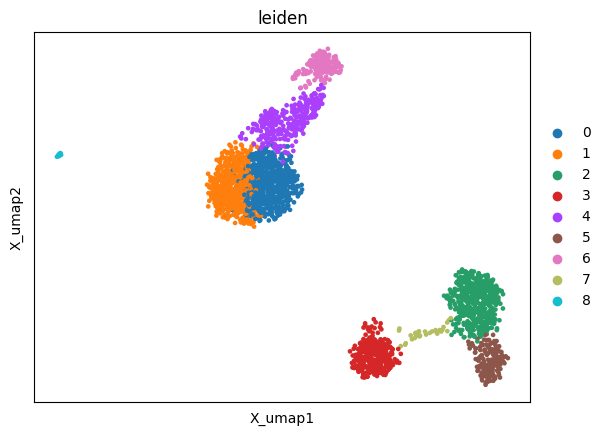

In [272]:
ax=sc.pl.embedding(adata2, 'X_umap', color=['leiden'])

In [29]:
ax

/Users/afuchs/anaconda3/envs/project_sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


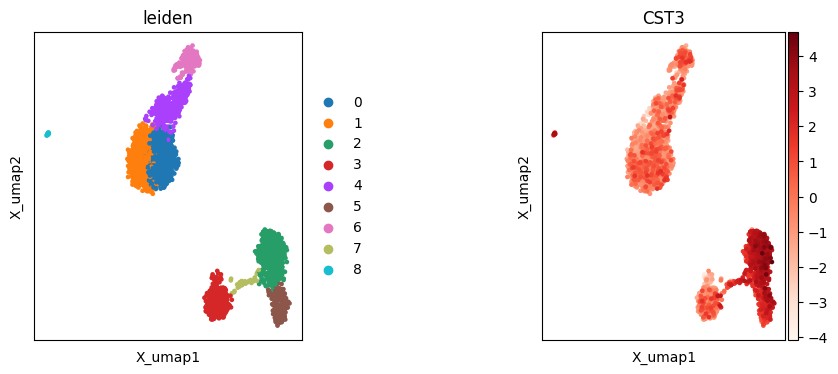

In [273]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), gridspec_kw={'wspace':0.9})

ax1_dict = sc.pl.embedding(adata2, 'X_umap', color=['leiden'], ax=ax1, show=False)
ax2_dict = sc.pl.embedding(adata2, 'X_umap', color=['CST3'], cmap='Reds', ax=ax2, show=False)

In [196]:
fig, (ax1) = plt.subplots(1, 1, figsize=(4,4), gridspec_kw={'wspace':0.9})

ax1_dict = sc.pl.embedding(adata2, 'X_umap', color=['leiden'], ax=ax1, show=False, save='.pdf')


/Users/afuchs/anaconda3/envs/project_sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


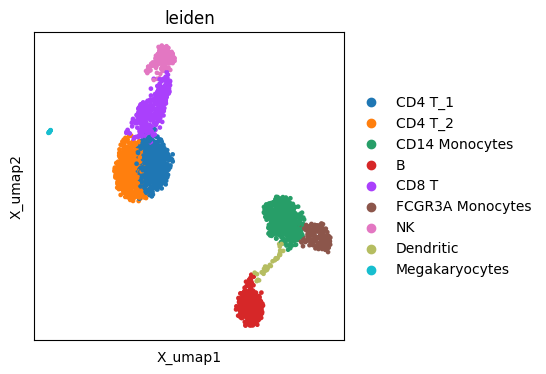

In [71]:
fig

In [198]:
def plot_umap(adata, color=['CST3']):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), gridspec_kw={'wspace':0.9})
    ax1_dict = sc.pl.embedding(adata2, 'X_umap', color=['leiden'], ax=ax1, show=False)
    ax2_dict = sc.pl.embedding(adata2, 'X_umap', color=color, cmap='Reds', ax=ax2, show=False)
    return fig

/Users/afuchs/anaconda3/envs/project_sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


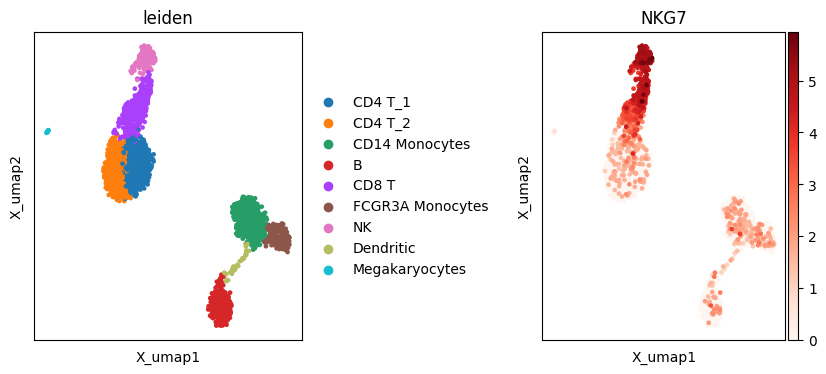

In [199]:
fig = plot_umap(adata2, color=['NKG7'])

In [200]:
%pwd

'/Users/afuchs/Documents/Courses/Data_Science/sandbox/Final_project/scanpy/web_app'

In [201]:
fig.savefig('./uploads/test.pdf')

In [41]:
def plot_umap(adata2, color=['leiden']):
    fig, (ax1) = plt.subplots(1, 1, figsize=(4,4), gridspec_kw={'wspace':0.9})
    ax1_dict = sc.pl.embedding(adata, 'X_umap', color=color, ax=ax1, show=False #, save='.pdf'
    )
    return fig

/Users/afuchs/anaconda3/envs/project_sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


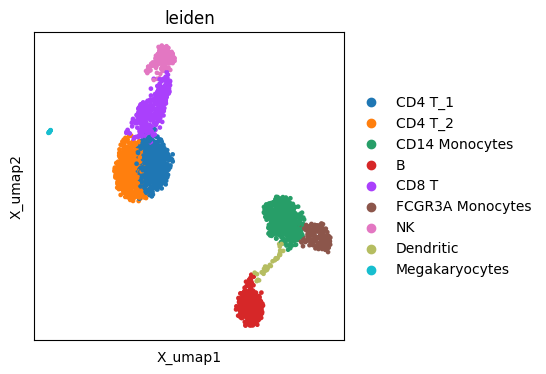

In [48]:
fig = plot_umap(adata2)

/Users/afuchs/anaconda3/envs/project_sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


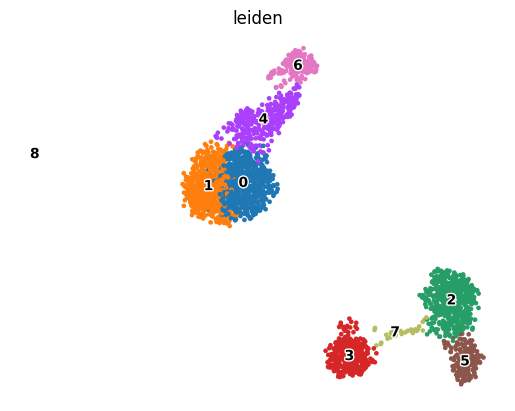

In [274]:
sc.pl.umap(adata2, color='leiden', legend_loc='on data', frameon=False, legend_fontsize=10, legend_fontoutline=2)

In [275]:
def plot_umap(adata, color=['leiden']):
    fig, (ax1) = plt.subplots(1, 1, figsize=(4,4), gridspec_kw={'wspace':0.9})
    ax1_dict = sc.pl.embedding(adata, 'X_umap', color=color, ax=ax1, show=False, frameon=False,
                                legend_loc='on data', legend_fontsize=10, legend_fontoutline=1
                                )
    return fig

/Users/afuchs/anaconda3/envs/project_sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


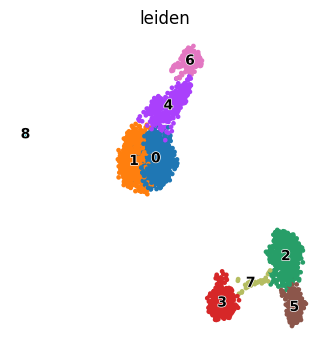

In [276]:
fig = plot_umap(adata2)

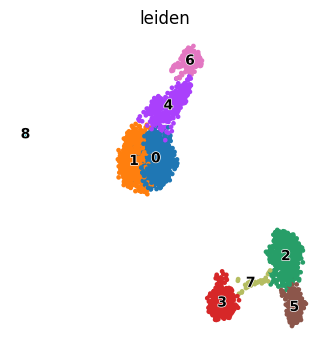

In [277]:
fig

In [278]:
def plot_umap_gene(adata, color=['NKG7']):
    fig, (ax2) = plt.subplots(1, 1, figsize=(4,4), gridspec_kw={'wspace':0.9})
    ax2_dict = sc.pl.embedding(adata2, 'X_umap', color=color, cmap='Reds', ax=ax2, show=False, frameon=False)
    return fig

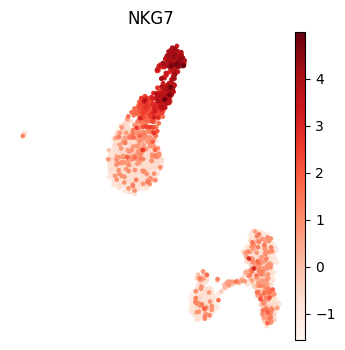

In [279]:
fig = plot_umap_gene(adata2, color=['NKG7'])

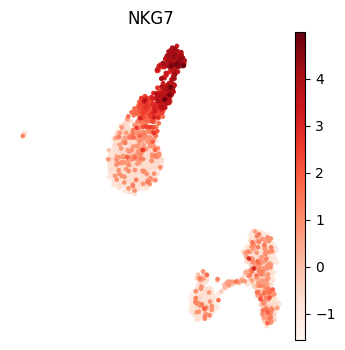

In [280]:
fig

In [58]:
adata2.obs_names

Index(['AAACATACAACCAC-1', 'AAACATTGAGCTAC-1', 'AAACATTGATCAGC-1',
       'AAACCGTGCTTCCG-1', 'AAACCGTGTATGCG-1', 'AAACGCACTGGTAC-1',
       'AAACGCTGACCAGT-1', 'AAACGCTGGTTCTT-1', 'AAACGCTGTAGCCA-1',
       'AAACGCTGTTTCTG-1',
       ...
       'TTTCAGTGTCACGA-1', 'TTTCAGTGTCTATC-1', 'TTTCAGTGTGCAGT-1',
       'TTTCCAGAGGTGAG-1', 'TTTCGAACACCTGA-1', 'TTTCGAACTCTCAT-1',
       'TTTCTACTGAGGCA-1', 'TTTCTACTTCCTCG-1', 'TTTGCATGAGAGGC-1',
       'TTTGCATGCCTCAC-1'],
      dtype='object', length=2638)

In [64]:
genes=adata2.var_names

In [132]:
#list(genes)

## Dotplot

In [281]:
adata2

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

/Users/afuchs/anaconda3/envs/project_sc/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


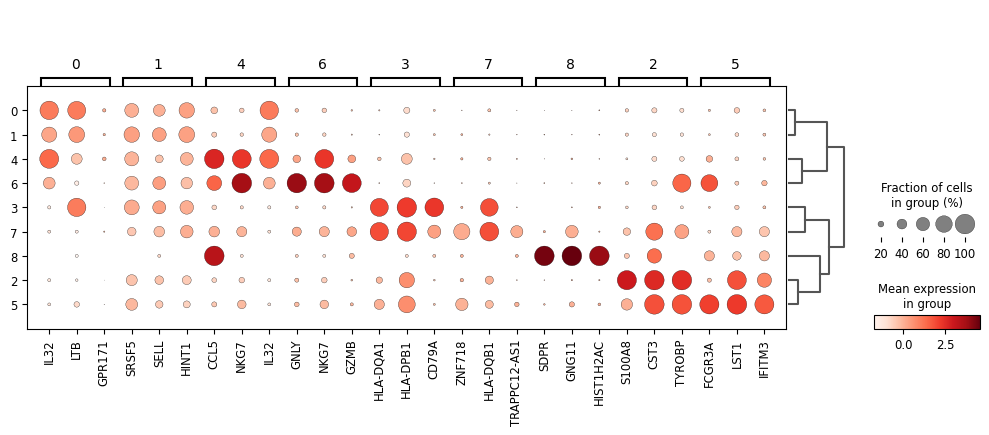

In [358]:
sc.pl.rank_genes_groups_dotplot(adata2, n_genes=3)

/Users/afuchs/anaconda3/envs/project_sc/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


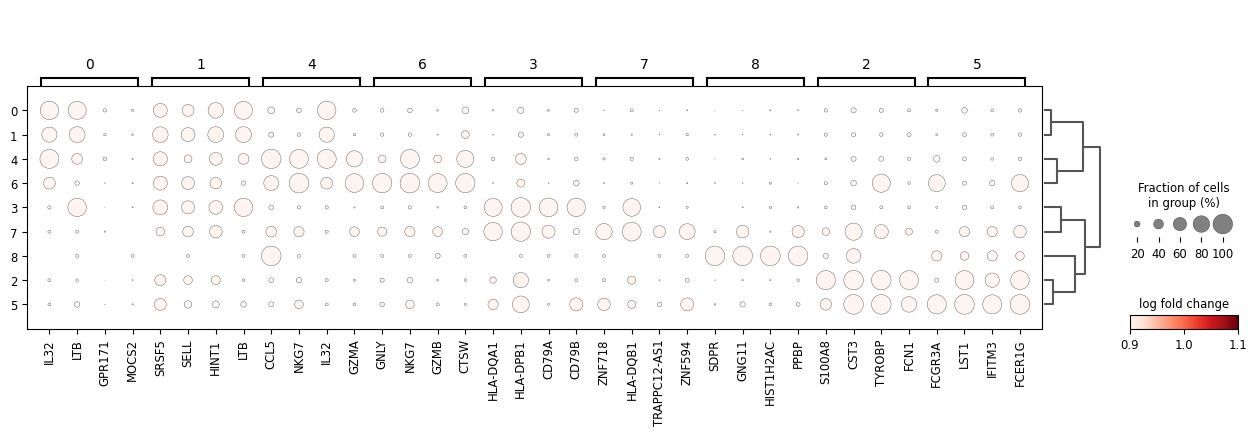

In [359]:
sc.pl.rank_genes_groups_dotplot(adata2, n_genes=4, values_to_plot='logfoldchanges')

/Users/afuchs/anaconda3/envs/project_sc/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


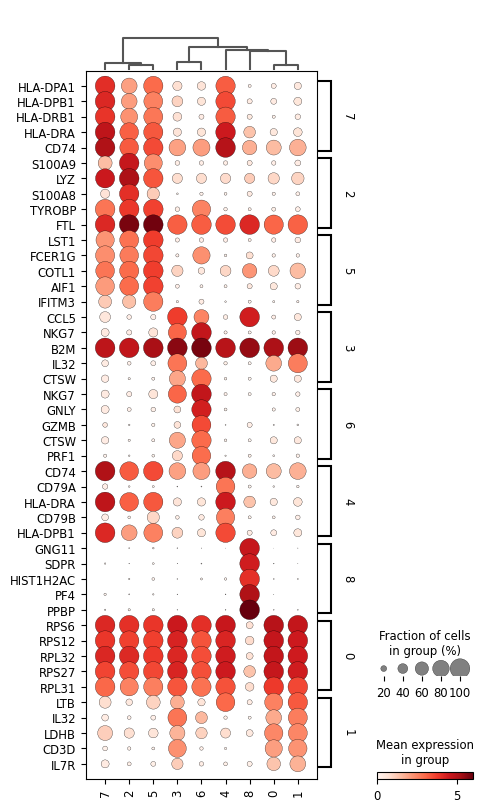

In [244]:
fig, (ax2) = plt.subplots(1, 1, figsize=(5,10), gridspec_kw={'wspace':5.0})
ax2_dict = sc.pl.rank_genes_groups_dotplot(adata4, n_genes=5, ax=ax2, swap_axes=True, show=False)

/Users/afuchs/anaconda3/envs/project_sc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:2414: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  obs_tidy.index.value_counts(sort=False).iteritems()


{'heatmap_ax': <AxesSubplot: >,
 'groupby_ax': <AxesSubplot: xlabel='leiden'>,
 'dendrogram_ax': <AxesSubplot: >,
 'gene_groups_ax': <AxesSubplot: >}

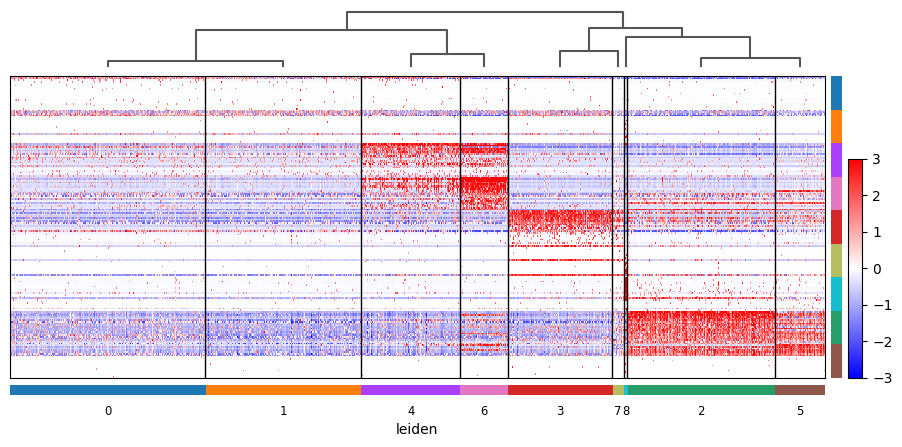

In [284]:
sc.pl.rank_genes_groups_heatmap(adata2, n_genes=20, use_raw=False, swap_axes=True, vmin=-3, vmax=3, cmap='bwr', figsize=(11,5), show=False)


In [260]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,10), gridspec_kw={'wspace':0.5})
# ax1_dict = sc.pl.rank_genes_groups_dotplot(adata4, n_genes=5, ax=ax1, show=False)
# ax2_dict= sc.pl.rank_genes_groups_heatmap(adata4, n_genes=20, use_raw=False, cmap='bwr', 
#                     #figsize=(11,5), 
#                     ax=ax2,show=False)

In [209]:
#get_subplot_params(self, figure=fig)[source]

In [285]:
def plot_dotplot(adata):
    fig, (ax2) = plt.subplots(1, 1, figsize=(11,4) )
    ax2_dict = sc.pl.rank_genes_groups_dotplot(adata, n_genes=3, ax=ax2, show=False)
    fig.tight_layout()
    return fig

/Users/afuchs/anaconda3/envs/project_sc/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


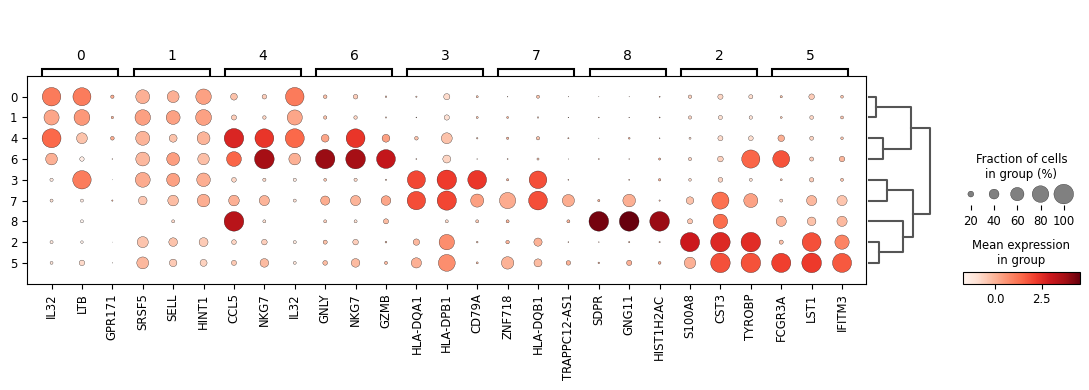

In [286]:
fig=plot_dotplot(adata2)

### Combine clusters with dotplot

/Users/afuchs/anaconda3/envs/project_sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/afuchs/anaconda3/envs/project_sc/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


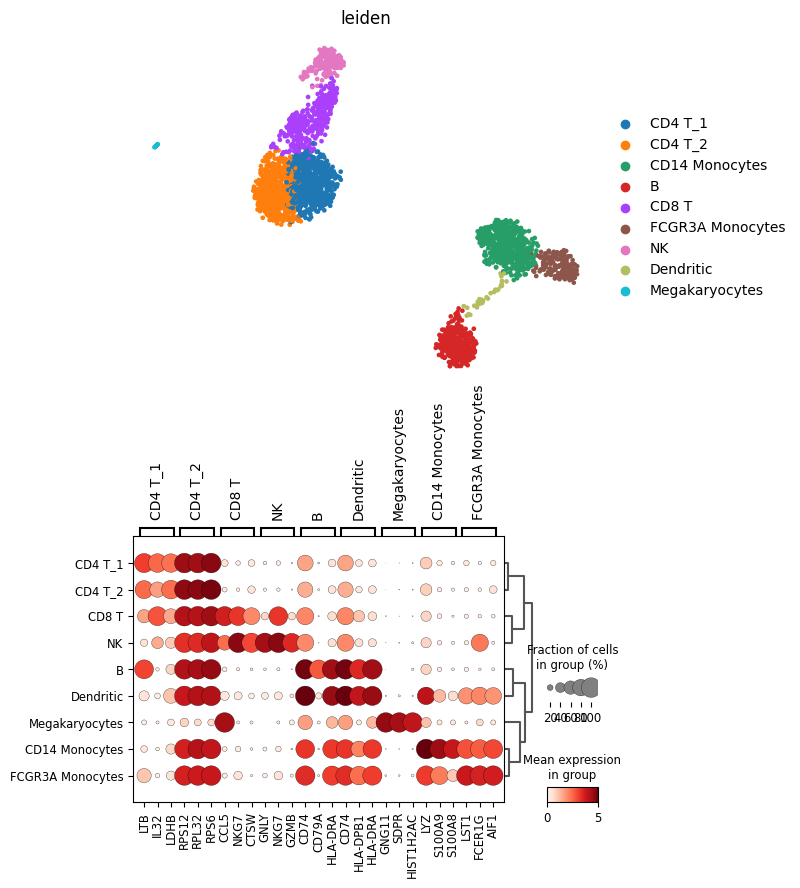

In [102]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,10), gridspec_kw={'wspace':0.5})
ax1_dict = sc.pl.embedding(adata2, 'X_umap', color=['leiden'], ax=ax1, frameon=False, show=False)
ax2_dict = sc.pl.rank_genes_groups_dotplot(adata2, n_genes=3, ax=ax2, show=False)

/Users/afuchs/anaconda3/envs/project_sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/afuchs/anaconda3/envs/project_sc/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


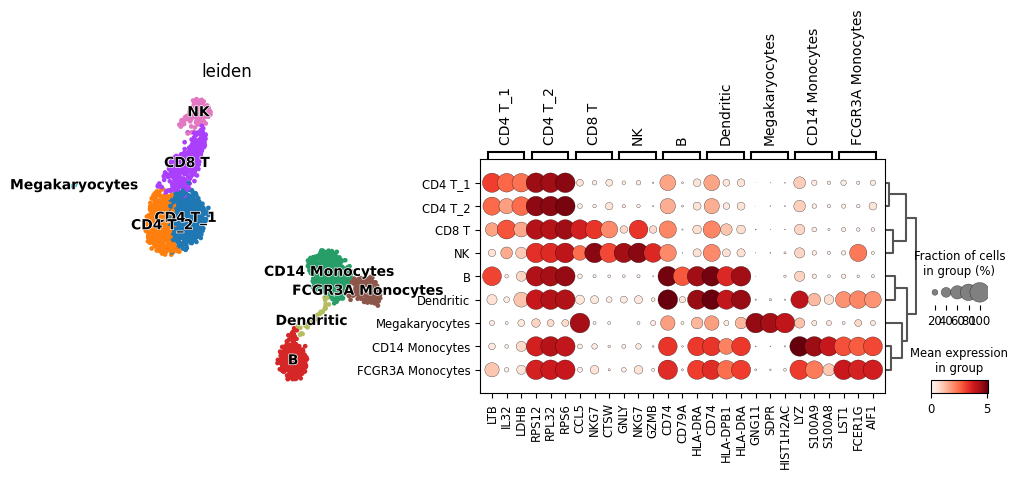

In [130]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), gridspec_kw={'width_ratios': [2,3]})
ax1_dict = sc.pl.embedding(adata2, 'X_umap', color=['leiden'], ax=ax1, frameon=False, show=False,
                            legend_loc='on data', legend_fontsize=10, legend_fontoutline=1)
ax2_dict = sc.pl.rank_genes_groups_dotplot(adata2, n_genes=3, ax=ax2, show=False)

## Violin plot

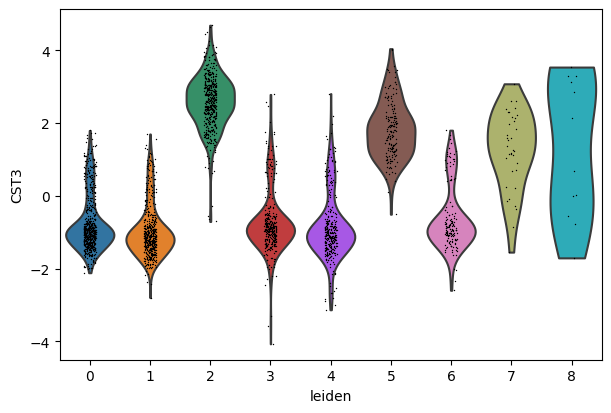

In [287]:
sc.pl.violin(adata2, ['CST3'], groupby='leiden')

## Combined violin and gene plot

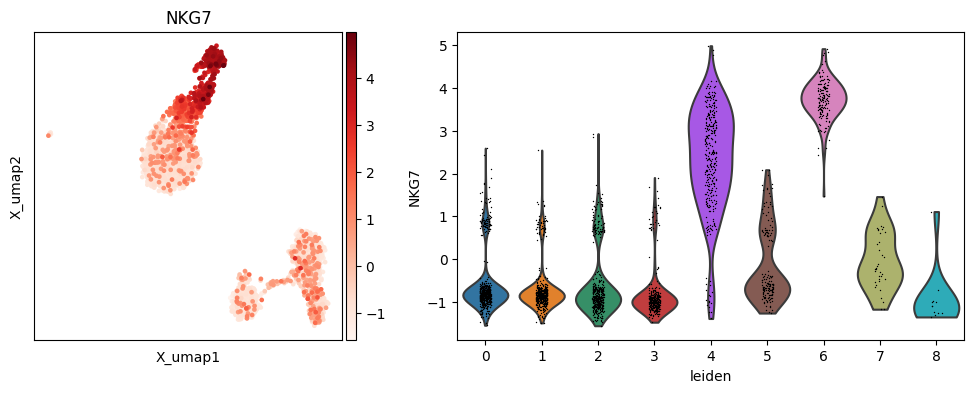

In [288]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), gridspec_kw={'width_ratios': [2,3]})
ax1_dict = sc.pl.embedding(adata2, 'X_umap', color=['NKG7'], cmap='Reds', ax=ax1, show=False)
ax2_dict = sc.pl.violin(adata2, ['NKG7'], groupby='leiden', frameon=False, ax=ax2, show=False)

In [289]:
def plot_umap_gene_violin(adata, color=['NKG7']):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6), gridspec_kw={'width_ratios': [2,3]})
    ax1_dict = sc.pl.embedding(adata, 'X_umap', color=color, cmap='Reds', ax=ax1, show=False)
    ax2_dict = sc.pl.violin(adata, color, groupby='leiden', frameon=False, ax=ax2, show=False)
    return fig

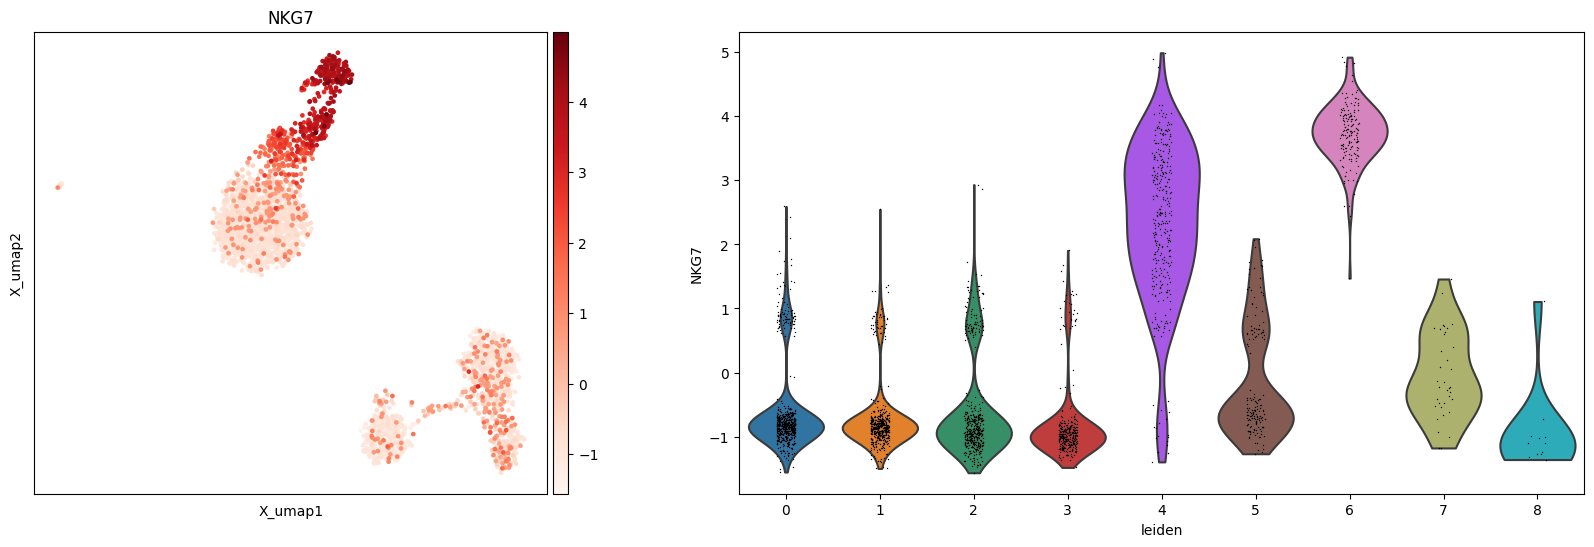

In [290]:
fig=plot_umap_gene_violin(adata2)

## Heatmaps

In [144]:
adata2

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap', 'dendrogram_leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

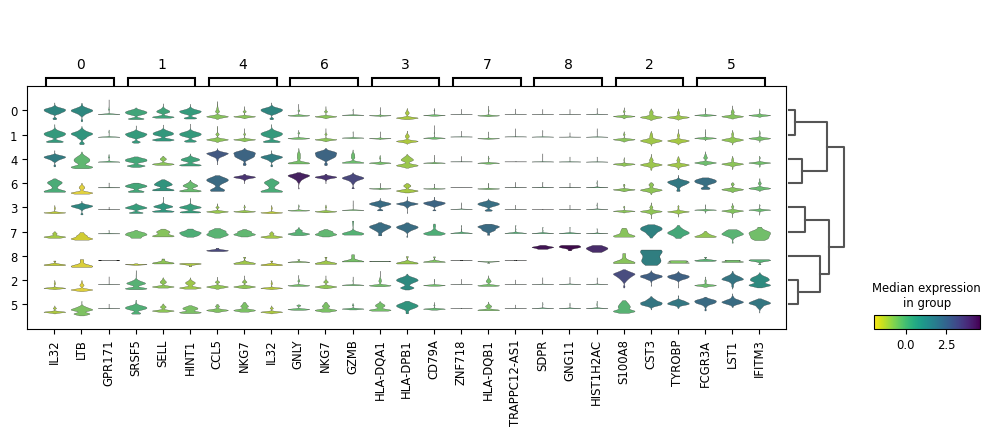

In [291]:
sc.pl.rank_genes_groups_stacked_violin(adata2, n_genes=3, cmap='viridis_r')

/Users/afuchs/anaconda3/envs/project_sc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:2414: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  obs_tidy.index.value_counts(sort=False).iteritems()


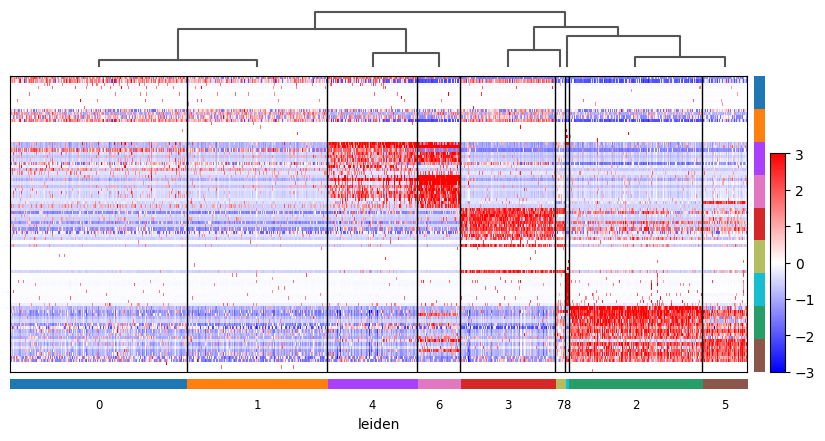

In [292]:
sc.pl.rank_genes_groups_heatmap(adata2, n_genes=10, use_raw=False, swap_axes=True, show_gene_labels=False,
                                vmin=-3, vmax=3, cmap='bwr')

## Table

In [215]:
adata4

AnnData object with n_obs × n_vars = 2638 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'rank_genes_groups', 'dendrogram_leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [232]:
result = adata4.uns['rank_genes_groups']
groups = result['names'].dtype.names
table=pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(20)

In [233]:
table

,0_n,0_p,1_n,1_p,2_n,2_p,3_n,3_p,4_n,4_p,5_n,5_p,6_n,6_p,7_n,7_p,8_n,8_p
0,RPS6,4.378442e-134,LTB,3.763864e-95,S100A9,2.909204e-237,CCL5,4.991495e-175,CD74,3.050940e-184,LST1,1.718459e-105,NKG7,5.903159e-94,HLA-DPA1,3.357765e-20,GNG11,2.161196e-09
1,RPS12,1.154995e-130,IL32,1.359296e-81,LYZ,7.808179e-236,NKG7,1.863831e-114,CD79A,1.103133e-171,FCER1G,3.204394e-101,GNLY,7.046669e-94,HLA-DPB1,5.126737e-19,SDPR,2.161196e-09
2,RPL32,1.822459e-126,LDHB,1.053445e-68,S100A8,1.504981e-234,B2M,1.011502e-82,HLA-DRA,1.315081e-167,COTL1,8.625740e-101,GZMB,3.938947e-87,HLA-DRB1,6.703656e-19,HIST1H2AC,2.166246e-09
3,RPS27,5.075235e-124,CD3D,1.256622e-66,TYROBP,2.095677e-208,IL32,4.725596e-80,CD79B,1.710306e-155,AIF1,1.408878e-100,CTSW,6.093136e-83,HLA-DRA,3.443044e-18,PF4,2.171307e-09
4,RPL31,6.938748e-115,IL7R,8.396764e-55,FTL,2.398298e-197,CTSW,6.322875e-73,HLA-DPB1,8.276225e-147,IFITM3,1.342540e-92,PRF1,7.046276e-82,CD74,3.651290e-18,PPBP,2.176380e-09
5,RPS25,6.176769e-110,CD2,3.265703e-47,FCN1,1.121301e-194,CST7,2.206391e-72,HLA-DQA1,1.132259e-140,FTH1,2.475877e-92,CST7,3.329461e-76,CST3,6.807842e-18,SPARC,2.191667e-09
6,RPL9,7.310911e-110,CD3E,9.344270e-46,CST3,8.415623e-193,GZMA,1.064309e-71,MS4A1,6.360240e-139,SAT1,1.095849e-87,GZMA,9.525161e-76,HLA-DQA1,1.744556e-17,RGS18,2.207060e-09
7,RPS14,1.106275e-108,TPT1,2.435676e-45,S100A6,7.873842e-192,HLA-C,8.181333e-62,HLA-DQB1,1.347418e-130,FCGR3A,2.306550e-87,HLA-C,7.839751e-73,HLA-DRB5,2.812250e-17,TPM4,2.232948e-09
8,RPL13,1.121558e-106,RPS25,2.857917e-38,LGALS2,1.033754e-190,CD3D,4.960284e-54,HLA-DRB1,5.853976e-130,FTL,2.695077e-84,FGFBP2,5.943517e-69,HLA-DQB1,1.728758e-15,NRGN,2.238161e-09
9,RPS3A,9.457604e-104,GIMAP7,4.154692e-38,FTH1,3.106171e-184,GZMK,2.710458e-50,CD37,2.467283e-129,PSAP,8.403814e-84,B2M,9.974449e-69,HLA-DMA,1.292898e-14,CD9,2.253872e-09


In [228]:
def diff_exp_table(adata):
    result = adata.uns['rank_genes_groups']
    groups = result['names'].dtype.names
    table=pd.DataFrame(
        {group + '_' + key[:1]: result[key][group]
        for group in groups for key in ['names', 'pvals']}).head(20)
    return table

In [230]:
table3=diff_exp_table(adata4)

In [231]:
table3

,0_n,0_p,1_n,1_p,2_n,2_p,3_n,3_p,4_n,4_p,5_n,5_p,6_n,6_p,7_n,7_p,8_n,8_p
0,RPS6,4.378442e-134,LTB,3.763864e-95,S100A9,2.909204e-237,CCL5,4.991495e-175,CD74,3.050940e-184,LST1,1.718459e-105,NKG7,5.903159e-94,HLA-DPA1,3.357765e-20,GNG11,2.161196e-09
1,RPS12,1.154995e-130,IL32,1.359296e-81,LYZ,7.808179e-236,NKG7,1.863831e-114,CD79A,1.103133e-171,FCER1G,3.204394e-101,GNLY,7.046669e-94,HLA-DPB1,5.126737e-19,SDPR,2.161196e-09
2,RPL32,1.822459e-126,LDHB,1.053445e-68,S100A8,1.504981e-234,B2M,1.011502e-82,HLA-DRA,1.315081e-167,COTL1,8.625740e-101,GZMB,3.938947e-87,HLA-DRB1,6.703656e-19,HIST1H2AC,2.166246e-09
3,RPS27,5.075235e-124,CD3D,1.256622e-66,TYROBP,2.095677e-208,IL32,4.725596e-80,CD79B,1.710306e-155,AIF1,1.408878e-100,CTSW,6.093136e-83,HLA-DRA,3.443044e-18,PF4,2.171307e-09
4,RPL31,6.938748e-115,IL7R,8.396764e-55,FTL,2.398298e-197,CTSW,6.322875e-73,HLA-DPB1,8.276225e-147,IFITM3,1.342540e-92,PRF1,7.046276e-82,CD74,3.651290e-18,PPBP,2.176380e-09
5,RPS25,6.176769e-110,CD2,3.265703e-47,FCN1,1.121301e-194,CST7,2.206391e-72,HLA-DQA1,1.132259e-140,FTH1,2.475877e-92,CST7,3.329461e-76,CST3,6.807842e-18,SPARC,2.191667e-09
6,RPL9,7.310911e-110,CD3E,9.344270e-46,CST3,8.415623e-193,GZMA,1.064309e-71,MS4A1,6.360240e-139,SAT1,1.095849e-87,GZMA,9.525161e-76,HLA-DQA1,1.744556e-17,RGS18,2.207060e-09
7,RPS14,1.106275e-108,TPT1,2.435676e-45,S100A6,7.873842e-192,HLA-C,8.181333e-62,HLA-DQB1,1.347418e-130,FCGR3A,2.306550e-87,HLA-C,7.839751e-73,HLA-DRB5,2.812250e-17,TPM4,2.232948e-09
8,RPL13,1.121558e-106,RPS25,2.857917e-38,LGALS2,1.033754e-190,CD3D,4.960284e-54,HLA-DRB1,5.853976e-130,FTL,2.695077e-84,FGFBP2,5.943517e-69,HLA-DQB1,1.728758e-15,NRGN,2.238161e-09
9,RPS3A,9.457604e-104,GIMAP7,4.154692e-38,FTH1,3.106171e-184,GZMK,2.710458e-50,CD37,2.467283e-129,PSAP,8.403814e-84,B2M,9.974449e-69,HLA-DMA,1.292898e-14,CD9,2.253872e-09


In [234]:
table3.describe().T

,count,mean,std,min,25%,50%,75%,max
0_p,20.0,4.927573e-88,2.186520e-87,4.378442e-134,4.632594e-110,1.026243e-103,1.899895e-98,9.781993e-87
1_p,20.0,6.857977e-28,1.599809e-27,3.763864e-95,2.449277e-47,1.683479e-36,7.907143e-29,5.001254e-27
2_p,20.0,5.417513e-139,2.422786e-138,2.909204e-237,8.415755e-195,1.817944e-183,4.731625e-157,1.083503e-137
3_p,20.0,3.846785e-29,1.439879e-28,4.991495e-175,1.812865e-72,1.887401e-47,6.613772e-37,6.372254e-28
4_p,20.0,5.126267e-49,2.230825e-48,3.050940e-184,8.491945e-141,5.557547e-125,3.091005e-62,9.987326e-48
5_p,20.0,1.014124e-71,3.137036e-71,1.718459e-105,2.192542e-92,2.253485e-83,3.632846e-75,1.337863e-70
6_p,20.0,3.100565e-43,1.212975e-42,5.903159e-94,2.497098e-76,1.108359e-58,3.182002e-47,5.411489e-42
7_p,20.0,9.519367e-12,1.575401e-11,3.357765e-20,6.018704e-18,6.540082e-14,9.854380e-12,4.995780e-11
8_p,20.0,4.950801e-09,5.688353e-09,2.161196e-09,2.187846e-09,2.256502e-09,3.332637e-09,2.375452e-08


In [236]:
t_html=table3.to_html()


In [238]:
#t_html

In [240]:
table3.to_csv('./uploads/DiffGene_table.csv')

# Test request args

In [296]:
dict1={'gene': 'ENSG00000000457'}

In [297]:
dict2={'map': 'U_map', 'gene': 'ENSG00000000457'}

In [298]:
dict2

{'map': 'U_map', 'gene': 'ENSG00000000457'}

In [351]:
dict3={'gene': 'new_gene'}

In [346]:
dict4={'map': 'another_U_map'}

In [303]:
map=dict1.get('map')

In [305]:
print(map)

None


In [309]:
# Check if there is map
if dict1.get('map'):
    map=dict1.get('map')
    print (map)
else:
    map=1
    print(f"There is no map, map set to: {map} ")

There is no map, map set to: 1 


In [352]:
dict=dict3

In [ ]:
if pd.isna(dict1.get('map')):
    

In [353]:
#map='new'
if dict.get('map'):
    map=dict.get('map')
    print (map)
    if dict.get('gene'):
        gene=dict.get('gene')
        print (gene)
    else: 
        gene=0
        print(f"There is no gene, gene set to: {gene} ")
else:
    if map:
        print(map)
    else:
        map=1
        print(f"There is no map, map set to: {map} ")
    if dict.get('gene'):
        gene=dict.get('gene')
        print (gene)
    else: 
        gene=0
        print(f"There is no gene, gene set to: {gene} ")

another_U_map
new_gene


In [355]:
pd.isna(dict1.get('map'))

True

In [349]:
#map='new'
if dict.get('map'):
    map=dict.get('map')
    print (map)
else:
    if map:
        print(map)
    else:
        map=1
        print(f"There is no map, map set to: {map} ")
    if dict.get('gene'):
        gene=dict.get('gene')
        print (gene)
    else: 
        gene=0
        print(f"There is no gene, gene set to: {gene} ")

another_U_map


In [ ]:
if pd.isna(dict1.get('map')):
    